<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[Decision tree](#dtree)**
2. **[Random forest](#rf)**

**Import the required libraries**

In [410]:
# type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the csv file

In [411]:
# type your code here
df=pd.read_csv('emp_attrition.csv')

In [412]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


In [413]:
df['PerformanceRating'].value_counts()

3    1580
Name: PerformanceRating, dtype: int64

In [414]:
df.drop(columns='PerformanceRating',inplace = True)

In [415]:
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
YearsAtCompany             0
dtype: int64

### Let's begin with some hands-on practice exercises

<a id="dtree"> </a>
## 1. Decision tree

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Write a code to detect the outliers in the dataset. Remove the outliers using IQR method, if present.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [416]:
df.shape

(1580, 17)

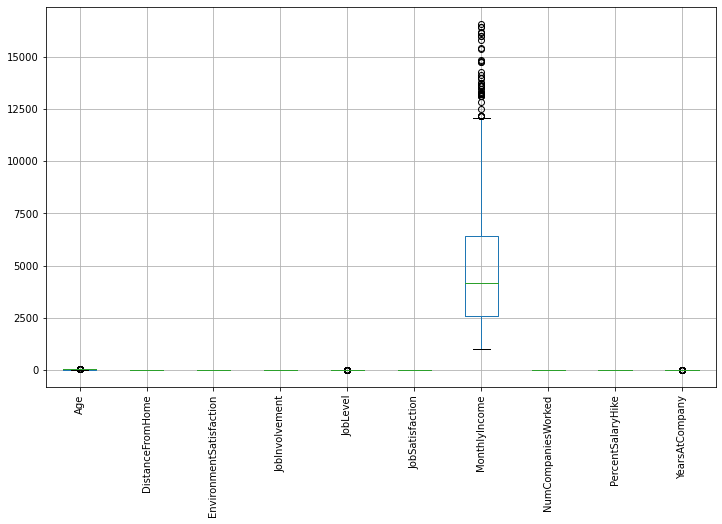

In [417]:
df.boxplot(figsize=(12,7))
plt.xticks(rotation=90)
plt.show()

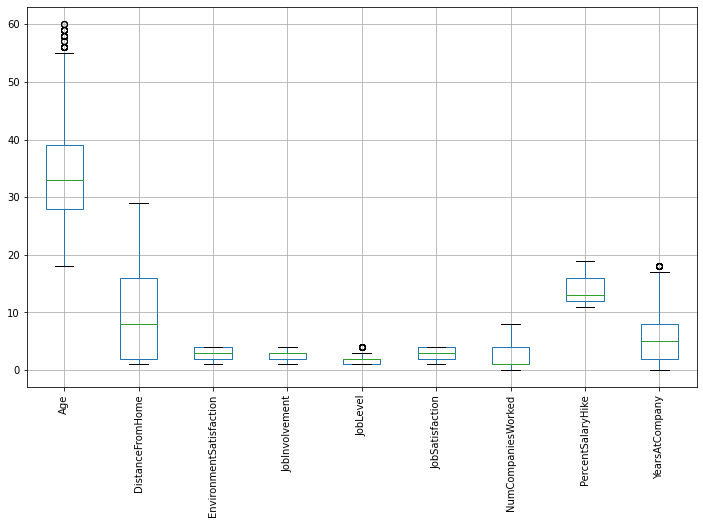

In [418]:
df.drop(columns='MonthlyIncome').boxplot(figsize=(12,7))
plt.xticks(rotation=90)
plt.show()

In [419]:
# type your code here
q1 = df.quantile(0.25)
q2 = df.quantile(0.5)
q3 = df.quantile(0.75)
IQR = q3-q1

In [420]:
df = df[~((df < q1-1.5*IQR) | (df > q3+1.5*IQR))].reset_index(drop=True)

In [421]:
df.isnull().sum()

Age                        36
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                   38
JobRole                     0
JobSatisfaction             0
MonthlyIncome              53
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
YearsAtCompany             12
dtype: int64

In [422]:
df.dropna(inplace=True)

In [423]:
df.shape

(1487, 17)

In [424]:
df['Attrition'].replace({'Yes':1,'No':0},inplace=True)

In [425]:
df_c = df.select_dtypes(include='object')
df_n = df.select_dtypes(include=np.number)

In [426]:
for i in df_c.columns:
    df_c = pd.get_dummies(df_c,columns=[i],drop_first=True)

In [427]:
df_c.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [428]:
df = pd.concat([df_n,df_c],axis=1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a model to predict whether or not an employee will leave the company based on employee's environment satisfaction and monthly income. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [429]:
df.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'YearsAtCompany',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'OverTime_Yes'],
      dtype='object')

In [430]:
# type your code here
from sklearn.model_selection import train_test_split

x = df[['EnvironmentSatisfaction','MonthlyIncome']]
y = df['Attrition']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1)

In [431]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=1)

In [432]:
ypred = dt.predict(xtest)

In [433]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest,ypred)

0.8657718120805369

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Build a full model to predict if an employee will leave the company. Find three features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [434]:
# type your code here
y = df['Attrition']
x_full = df.drop(columns='Attrition')

xtrain_full,xtest_full,ytrain,ytest = train_test_split(x_full,y,test_size=0.3,random_state=0)

from sklearn.tree import DecisionTreeClassifier

dt_full = DecisionTreeClassifier(random_state=1)

In [435]:
dt_full.fit(xtrain_full,ytrain)

DecisionTreeClassifier(random_state=1)

In [436]:
ypred_full = dt_full.predict(xtest_full)
accuracy_score(ytest,ypred_full)

0.8612975391498882

In [437]:
pd.DataFrame(dt_full.feature_importances_,index=xtrain_full.columns,columns=['Importance']).sort_values(by='Importance',ascending = False).head(3)

,Importance
MonthlyIncome,0.125206
Age,0.124567
YearsAtCompany,0.110204


The three most important features are MonthlyIncome, Age, YearsAtCompany

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4.  Find the area under the receiver operating characteristic curve for full model built in question 3. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

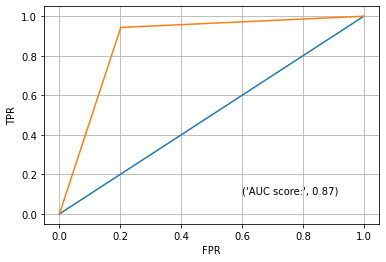

In [438]:
# type your code here
from sklearn.metrics import roc_curve, roc_auc_score

fpr,tpr, thresholds = roc_curve(ytest,ypred_full)

plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.text(x=0.6,y=0.1,s=('AUC score:',round(roc_auc_score(ytest,ypred_full),2)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(True)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Plot a confusion matrix for the full model built in Q3.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

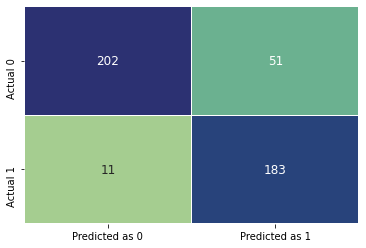

In [439]:
# type your code here
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(ytest,ypred_full),columns=['Predicted as 0','Predicted as 1'], index=['Actual 0','Actual 1'])

sns.heatmap(cm,annot=True,fmt='d',cbar=False,cmap='crest',linewidths=0.1,annot_kws={'size':12})
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Calculate the specificity, sensitivity, % of misclassified and correctly classified observations. What can you say about the model by looking at the sensitivity and specificity values? Is this a good model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [440]:
# type your code here
TN = cm.iloc[0,0]
TP = cm.iloc[1,1]
FP = cm.iloc[1,0]
FN = cm.iloc[0,1]
tot = TP+TN+FP+FN

cor_class_percent = ((TP+TN)/tot)*100
incor_class_percent = 100-cor_class_percent

print('Sensitivity =',TP/(TP+FN))
print('Specificity =',TN/(TN+FP))
print('Percentage of correct classification =',round(cor_class_percent,2))
print('Percentage of incorrect classification =',round(incor_class_percent,2))

Sensitivity = 0.782051282051282
Specificity = 0.9483568075117371
Percentage of correct classification = 86.13
Percentage of incorrect classification = 13.87


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build and plot a decision tree with maximum 5 terminal nodes.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

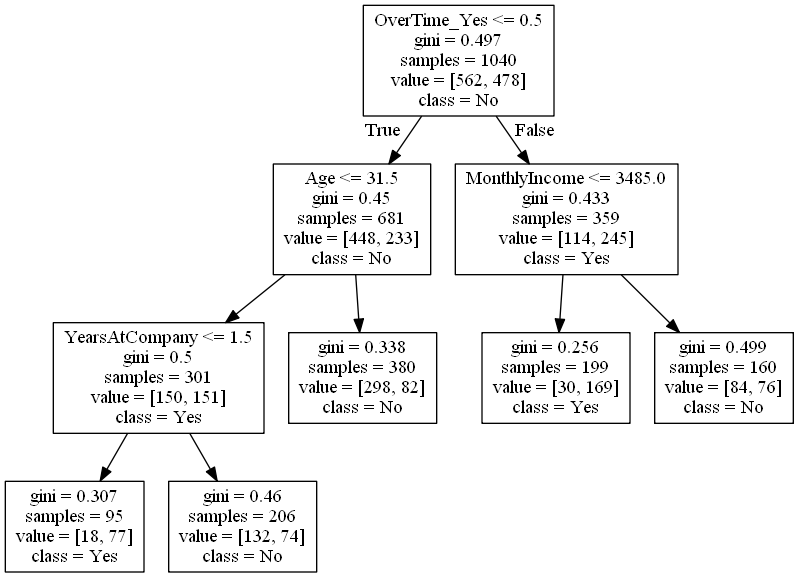

In [441]:
# type your code here
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image

dt = DecisionTreeClassifier(max_leaf_nodes=5)
dt.fit(xtrain_full,ytrain)

labels= xtrain_full.columns

dot_data = export_graphviz(dt, feature_names=labels, class_names=['No','Yes'])

graph = graph_from_dot_data(dot_data)

Image(graph.create_png())

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a Decision Tree model with the predefined parameters and find the average accuracy by performing the 10 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [442]:
# type your code here
from sklearn.model_selection import cross_val_score

cv = cross_val_score(dt_full,x_full,y,cv=10, scoring='accuracy')

In [443]:
print('The avg accuracy of the Decision Tree is',round(np.mean(cv),3))

The avg accuracy of the Decision Tree is 0.902


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. For a decision tree model, find the best value of hyperparameters "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the values as:
        
     criterion = ['entropy', 'gini'],
     max_depth = range(2, 10),
     min_samples_split = range(2,10)

In [444]:
# type your code here
from sklearn.model_selection import RandomizedSearchCV

params = {'criterion' : ['entropy', 'gini'], 'max_depth' : np.arange(2, 10), 'min_samples_split' : np.arange(2,10)}

rcv = RandomizedSearchCV(dt_full,param_distributions=params,cv=3)
rcv.fit(x_full,y)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [445]:
print('The best parameters are',rcv.best_params_)

The best parameters are {'min_samples_split': 7, 'max_depth': 9, 'criterion': 'gini'}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>10. Build a decision tree model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [446]:
dt = DecisionTreeClassifier(**rcv.best_params_,random_state=2)
dt.fit(xtrain_full,ytrain)

DecisionTreeClassifier(max_depth=9, min_samples_split=7, random_state=2)

In [447]:
# type your code here
cv = cross_val_score(dt_full,x_full,y,cv=10, scoring='roc_auc')

In [448]:
print('The avg AUC score is',np.mean(cv))

The avg AUC score is 0.9090100932713551


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Build 5 decision trees each with 20 random features. Also predict the attrition for test set for each model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [449]:
# type your code here
cols = xtrain_full.columns
models={}

for i in range(1,6):
    l=[]
    sample = np.random.choice(cols,size=20)
    Xtr = xtrain_full[sample]
    Xts = xtest_full[sample]
    dt_i = DecisionTreeClassifier()
    dt_i.fit(Xtr,ytrain)
    Ypred = dt_i.predict(Xts)
    l.append([Ypred,sample])
    models['Model_%s'%i] = l

In [450]:
models.keys()

dict_keys(['Model_1', 'Model_2', 'Model_3', 'Model_4', 'Model_5'])

In [451]:
models['Model_1']

[[array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
         1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
         1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
         0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
         1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
         0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
         1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
         1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
         0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
         1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
         1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
         1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
         0, 1, 0, 1, 0, 1

In [452]:
models['Model_2']

[[array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
         1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
         1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
         1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
         0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
         1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
         0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
         0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
         1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
         1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
         1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
         1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
         0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
         0, 1, 0, 1, 0, 0

In [453]:
models['Model_3']

[[array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
         1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
         1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
         1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
         0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
         1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
         0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
         0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
         1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
         0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
         1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
         1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
         0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
         0, 1, 1, 1, 0, 0

In [454]:
models['Model_4']

[[array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
         1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
         1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
         1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
         0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
         1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
         0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
         0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
         1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
         0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
         1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
         1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
         1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
         0, 1, 0, 1, 0, 0

In [455]:
models['Model_5']

[[array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
         1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
         1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
         1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
         0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
         1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
         0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
         0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
         1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
         0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
         1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
         1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
         0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
         0, 1, 0, 1, 0, 0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Create a new dataframe "model_predictions_df" by appending each prediction made in question 8. There will be 5 columns in the dataframe for each prediction using the decision tree models built in above question.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [456]:
# type your code here
model_predictions_df = pd.DataFrame()
for i in models.keys():
    model_predictions_df[i]=models[i][0][0]

In [457]:
model_predictions_df.head(25)

,Model_1,Model_2,Model_3,Model_4,Model_5
0,1,1,1,1,1
1,0,0,0,0,0
2,1,1,1,1,1
3,0,0,0,0,1
4,0,0,0,0,0
5,0,0,0,0,0
6,1,0,0,0,0
7,1,0,0,0,0
8,0,0,0,0,0
9,0,0,0,0,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a new column "Voted_Result" in the dataframe "model_predictions_df" that contains the maximum occuring value (mode) of the 5 columns in the dataframe (row-wise).<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [458]:
model_predictions_df['Vored_result']=model_predictions_df.mode(axis=1)
model_predictions_df.head(5)

,Model_1,Model_2,Model_3,Model_4,Model_5,Vored_result
0,1,1,1,1,1,1
1,0,0,0,0,0,0
2,1,1,1,1,1,1
3,0,0,0,0,1,0
4,0,0,0,0,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Consider the values of "Voted_Result" as our new predictions and store its values in a variable "new_y_pred" and find the accuracy and the roc-auc score using new_y_pred.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [459]:
# type your code here
new_y_pred=model_predictions_df['Vored_result']

In [460]:
print('New accuracy score =',accuracy_score(ytest,new_y_pred))

New accuracy score = 0.9217002237136466


In [461]:
print('New Auc score =',roc_auc_score(ytest,new_y_pred))

New Auc score = 0.9230165844912596


<a id="rf"> </a>
## 2. Random Forest

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a random forest full model to predict if an employee will leave the company or not and generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [462]:
# type your code here
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=2)

rf.fit(xtrain_full,ytrain)
ypred_rf_full= rf.predict(xtest_full)

In [463]:
print(classification_report(ytest,ypred_rf_full))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       253
           1       0.93      0.94      0.94       194

    accuracy                           0.94       447
   macro avg       0.94      0.94      0.94       447
weighted avg       0.94      0.94      0.94       447



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. For a random forest model, find the best value of hyperparameters "n_estimators", "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    criterion = ['entropy', 'gini'],
    n_estimators = [90, 100, 150, 200],
    max_depth = [10, 15, 20],
    min_samples_split = [2, 5, 8]

In [464]:
# type your code here
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

params= {'criterion' : ['entropy', 'gini'],'n_estimators' : [90, 100, 150, 200],'max_depth' : [10, 15, 20],'min_samples_split' : [2, 5, 8]}

gscv= GridSearchCV(rf,param_grid=params,cv=3,scoring='roc_auc')
gscv.fit(x,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15, 20],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [90, 100, 150, 200]},
             scoring='roc_auc')

In [465]:
print('The best parameters are :',gscv.best_params_)

The best parameters are : {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Build a random forest model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [466]:
# type your code here
rf = RandomForestClassifier(**gscv.best_params_)

rf_cv = cross_val_score(rf,x,y,cv=10,scoring='roc_auc')

In [467]:
print('The mean ROC AUC score =',np.mean(rf_cv))

The mean ROC AUC score = 0.9182124442086289


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Using the tuned random forest model, find the features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [468]:
# type your code here
rf.fit(xtrain_full,ytrain)

print('The top 10 features with most importance are :')
t10 = pd.DataFrame(rf.feature_importances_,index=xtrain_full.columns,columns=['Importances']).sort_values(by='Importances',ascending=False).head(10)                                                                                                                                
t10

The top 10 features with most importance are :


,Importances
MonthlyIncome,0.137955
Age,0.121472
DistanceFromHome,0.090060
YearsAtCompany,0.084691
OverTime_Yes,0.079807
PercentSalaryHike,0.061512
NumCompaniesWorked,0.054375
JobSatisfaction,0.049441
EnvironmentSatisfaction,0.047490
JobInvolvement,0.046659


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Build a random forest model using the top 10 most important features.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [469]:
# type your code here
Xtr = xtrain_full[t10.index]
Xts = xtest_full[t10.index]

rf_10 = RandomForestClassifier(**gscv.best_params_)

rf_10.fit(Xtr,ytrain)


RandomForestClassifier(max_depth=20, n_estimators=200)

In [470]:
Y_10 = rf_10.predict(Xts)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Plot a confusion matrix and area under the receiver operating characteristic curve for the model built in question 19. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [471]:
# type your code here
fpr,tpr, thresholds = roc_curve(ytest,Y_10)

In [472]:
confusion_matrix(ytest,Y_10)

array([[225,  28],
       [ 13, 181]], dtype=int64)

In [473]:
roc_auc_score(ytest,Y_10)

0.9111588769813781

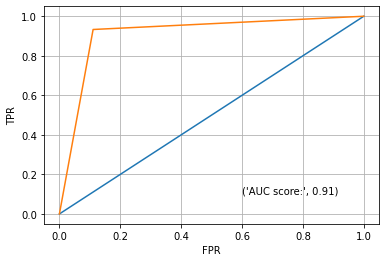

In [474]:
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.text(x=0.6,y=0.1,s=('AUC score:',round(roc_auc_score(ytest,Y_10),2)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(True)
plt.show()